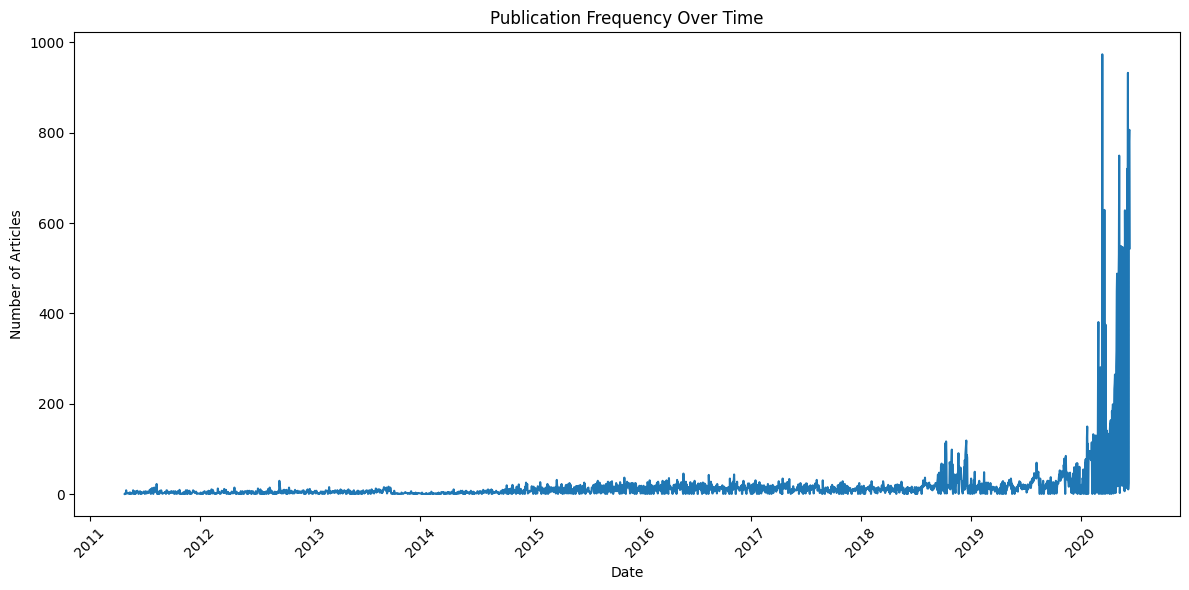


Spikes in Publication Frequency:
date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64


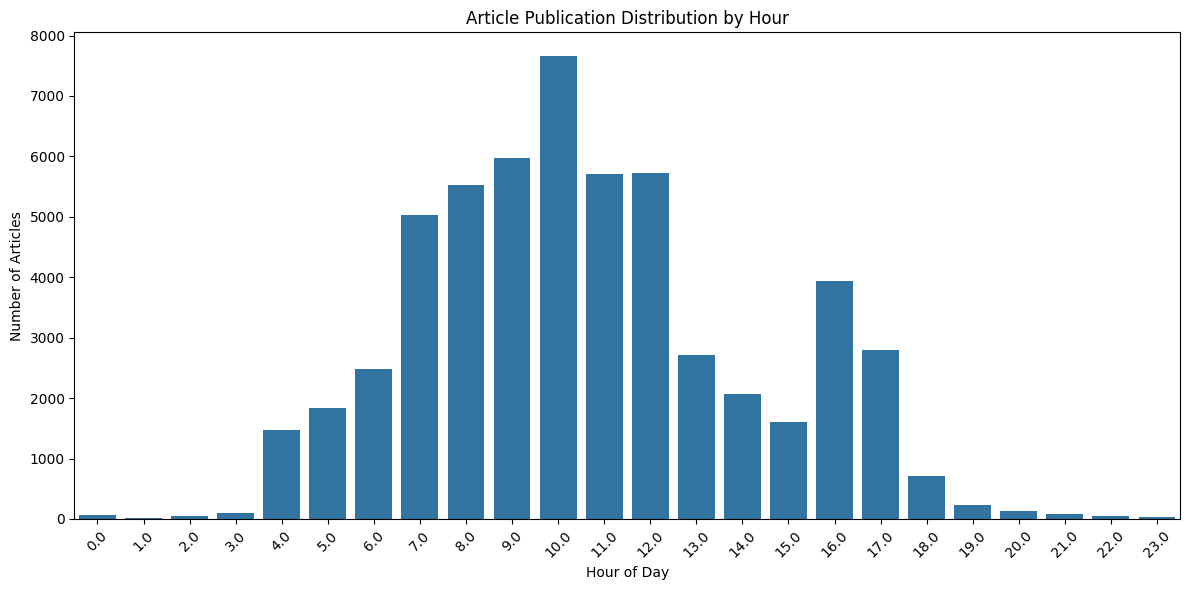

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('C:\\Users\\Tsebaot\\Desktop\\week 1\\financial-news-prediction-analysis\\data\\raw_analyst_ratings.csv')

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
#df['date'] = pd.to_datetime(df['date'])

# Group by date and count the articles
publication_counts = df.groupby(df['date'].dt.date).size()

# Plotting publication frequency over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=publication_counts.index, y=publication_counts.values)
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find peaks in publication counts
publication_spikes = publication_counts[publication_counts > publication_counts.mean() + 2 * publication_counts.std()]

# Display spikes
print("\nSpikes in Publication Frequency:")
print(publication_spikes)

# Extract time from the publication date
df['time'] = df['date'].dt.time

# Count articles published by hour
df['hour'] = df['date'].dt.hour
time_distribution = df['hour'].value_counts().sort_index()

# Plotting time distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=time_distribution.index, y=time_distribution.values)
plt.title('Article Publication Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [2]:
import os
import sys
sys.path.append("../scripts/")  # Add the scripts folder to the path

import utils as util
import eda
import visualization as viz


In [3]:
# Load data
all_data_path = '../data/raw_analyst_ratings.csv'
data = util.read_csv_file(all_data_path)
df = data.get("data")


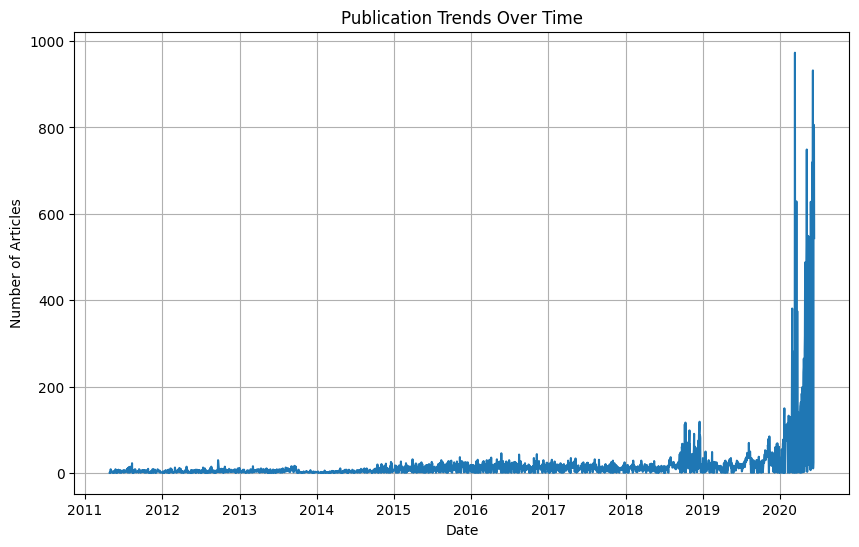

In [4]:

df = eda.parse_dates(df, column_name="date")
publication_trends = eda.calculate_publication_trends(df)
viz.plot_publication_trends(publication_trends)


In [5]:
# Find and display spikes
# publication_spikes = publication_counts[publication_counts > publication_counts.mean() + 2 * publication_counts.std()]
publication_counts = df.groupby(df['date'].dt.date).size()
publication_spikes = eda.find_publication_spikes(publication_counts)
print("\nSpikes in Publication Frequency:")
print(publication_spikes)



Spikes in Publication Frequency:
date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64


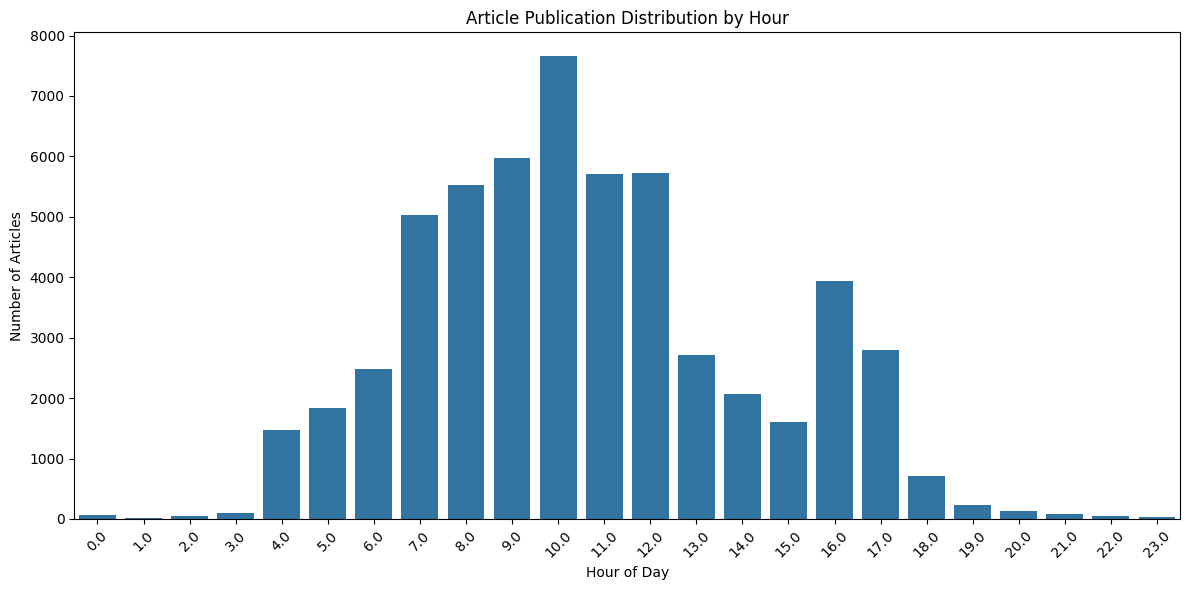

In [6]:
# Time distribution analysis
df = eda.extract_hour_from_datetime(df, 'date')
time_distribution = eda.count_articles_by_hour(df)
viz.plot_time_distribution(time_distribution)